In [6]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import logging
import copy
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import lab_tools
logging.basicConfig(level=logging.INFO)

In [2]:
path = '../extension2/first/'
path2 = '../extension2/second/'
path3 = '../extension2/3/'
path4 = '../extension2/high_freq/'
path5 = '../extension2/all/'

# d = lab_tools.read_to_dict(path)
d = lab_tools.read_to_dict(path5)

Error reading file ../extension2/all/.DS_Store


In [7]:
logging.basicConfig(level=logging.WARNING)

phases = []
frequencies = []
amplitudes = []
faild_fits = {}

def find_phase(w,a1,p1,c1,a2,p2,c2):
    f = 2 * np.pi / w 
    return f * (p1 - p2)

def find_z(w,a1,p1,c1,a2,p2,c2):
    return a2 / a1 

funcs = {'phase': find_phase, 'z': find_z}
limits = {'z': [0, 10000]}

for freq, df in copy.deepcopy(d).items():
    float_freq = float(freq)
    logging.info(f"frequency is {freq}")
    result = lab_tools.extract_data_from_fit(funcs, df, float_freq, display=False)

    if result:
        frequencies.append(float(freq))
        phases.append(result['phase'])
        amplitudes.append(result['z'])

    else:
        faild_fits[freq] = df
        del d[freq]
    


fit failed for frequency 220.0


fit failed for frequency 180.0


fit failed for frequency 2900.0
fit failed for frequency 1836600.0


fit failed for frequency 3100.0


fit failed for frequency 3300.0


fit failed for frequency 130.0


fit failed for frequency 300.0


fit failed for frequency 100.0


fit failed for frequency 2600.0


fit failed for frequency 3800.0


fit failed for frequency 7016600.0


In [8]:
amplitudes

[134.9334335582783,
 6.836569641266478,
 1654.8421175022977,
 1.592145159862506,
 23.35093793612698,
 696.4176165776694,
 34.580485701009486,
 15.355817419911327,
 12.476360868097279,
 24.618086368412726,
 5.4365730795000635,
 182.71935392424018,
 66.37131536585088,
 22.186470499002677,
 17.303305627564008,
 550.3222818912617,
 18.259136268473526,
 437.78158644337606,
 367.18281175182506,
 4.30569894444498,
 2.5763596392724892,
 2.0925609376531833,
 23.698035888572946,
 14.272801809225491,
 6.168855394686788,
 24.096263597059227,
 7.559206725034504,
 548.0136527000881,
 291.2389851489579,
 2827.857238102291,
 117.489251952071,
 18.551697056579155,
 4.800629922315992,
 26.627196645494532,
 3.054408315091477,
 45.1563045335585,
 554.8050141883048,
 965.8726522313624,
 3.829508242503703,
 17.690519723164257,
 32.47652651008294,
 2.3783824621383283,
 249.9597336164232,
 20.306645636757338,
 19.434958282417867,
 477.17201616349394,
 338.26152083804743,
 30.461264621667883,
 9.78349743440070

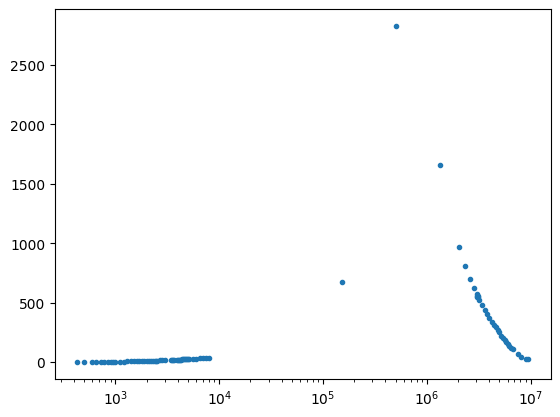

In [11]:
plt.semilogx(frequencies, amplitudes, '.')



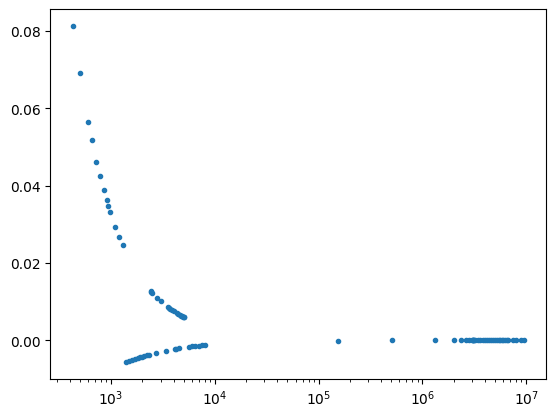

In [12]:
plt.semilogx(frequencies, phases, '.')

In [6]:
b = lab_tools.load_data('../data/week2/B/B_alot.csv')
c = lab_tools.load_data('../data/week2/C/C_3.csv')
d = lab_tools.load_data('../data/week2/D/D_3.csv')
e = lab_tools.load_data('../data/week2/E/E_3.csv')
materials = {
    'B': b,
    'C': c,
    'D': d,
    'E': e
    
}


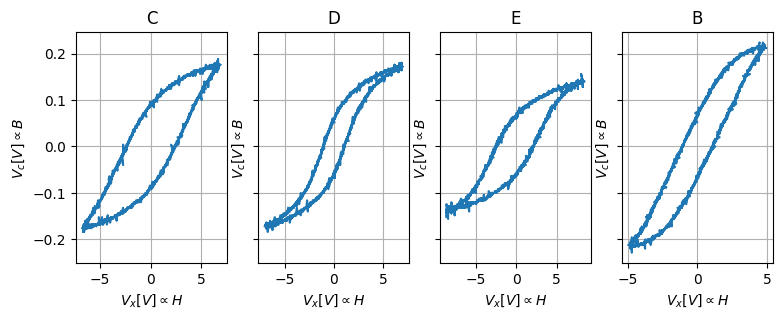

In [52]:
def show_multiple_graphs(d):
    fig, axs = plt.subplots(1, 4, figsize=(9, 3), sharey=True)
    for n, (k, v) in enumerate(d.items()):
        axs[n-1].plot(v['x'], v['y'])
        axs[n-1].set_title(k)
        axs[n-1].grid()
        axs[n-1].set_xlabel(r'$V_{x} [V] \propto H$')
        axs[n-1].set_ylabel(r'$V_{c} [V] \propto B$')

show_multiple_graphs(materials)
plt.savefig('../../graphs/part_1.svg', format='svg')

In [4]:
## get the hardness of the material
materials_properties = pd.DataFrame(
    {'material': ['B', 'C', 'D', 'E'],}
)
materials_properties

,material
0,B
1,C
2,D
3,E


In [15]:
# find hardness of the materials 
def find_hardness(xaxis,yaxis):
    positivezero,negativezero = lab_tools.findzeros(xaxis,yaxis)
    v = abs(positivezero[0] - negativezero[0]) / 2
    return v 

hardness_list_ = []
for k,v in materials.items():
    hardness_ = find_hardness(v['x'], v['y'])
    print(hardness_)
    hardness_list_.append(hardness_)
materials_properties['hardness'] = hardness_list_
    
materials_properties


1.12
2.3999999
1.08
2.40000005


,material,hardness
0,B,1.12
1,C,2.40
2,D,1.08
3,E,2.40


In [17]:
# find the area of the material
area_list_ = []
for k,v in materials.items():
    area_ = lab_tools.polyarea(v['x'], v['y'])
    print(area_)
    area_list_.append(area_)
materials_properties['power'] = area_list_
    
materials_properties

4.055520049171378
6.735520153073821
2.976320044143904
4.671200224922359


,material,hardness,power
0,B,1.12,4.05552
1,C,2.40,6.73552
2,D,1.08,2.97632
3,E,2.40,4.67120


In [23]:
# https://www.vedantu.com/iit-jee/self-inductance-of-a-solenoid
L1 = 1996 # the inductance of the soloenoid
l = 6.7E-2 # the length of the solenoid in meters 
mu = 1.25E-6 # mu of copper
A = 4.5e-2 * 5.5e-2 # the area of the solenoid in meters squared

N = np.sqrt((L1 * l) / (A * mu))

# https://en.wikipedia.org/wiki/Magnetomotive_force
F = N * I


NameError: name 'y' is not defined

In [4]:
p = d['1336600']

[323.0769535946765, 229.09091604545452, 252.00000765, 307.3170825, 286.36364505681814, 331.5789574342105, 257.1428780685142]


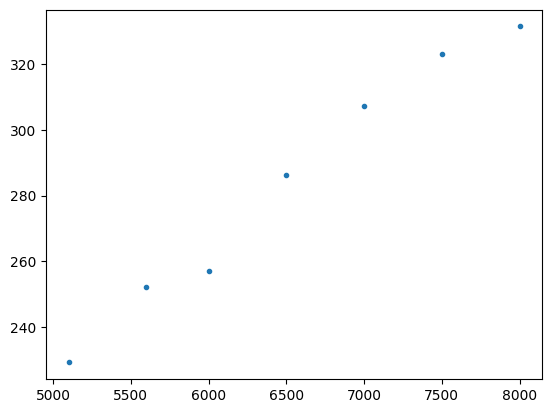

In [3]:
R = 10
modulus = []
freq = []

for k,v in d.items():
    y_1 = lab_tools.find_peak(v['x'],v['t'])[1] # after coil
    y_2 = lab_tools.find_peak(v['y'],v['t'])[1] # orginal - applied voltage
    modulus.append( R* (y_2 / y_1))
    freq.append(int(k))
    

plt.plot(freq, modulus, '.')
print(modulus)

array([ 5.06822901e+00,  8.27218898e+06, -1.33720275e+00, -3.48821860e-02])

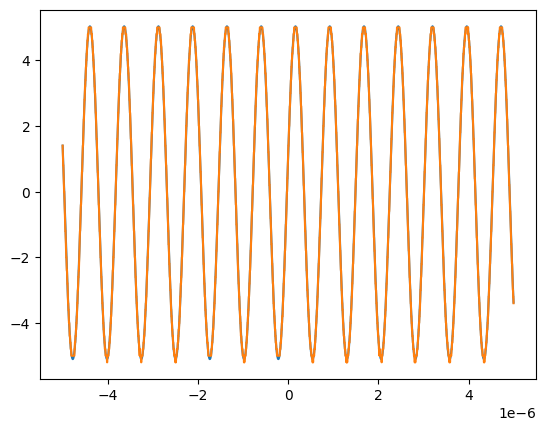

In [9]:
lab_tools.harmonic_fit(p, y='y',a0=1.5, w0=2*np.pi * 1336600)

In [6]:
1  2

0